In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Set path to image directory and annotation directory
image_dir = "/projects/rkraig/2019-600 images"
annotation_dir = "/projects/rkraig/2018-annotated data/Annotations"

In [3]:
# Create a list of image and annotation files
image_files = os.listdir(image_dir)
if not os.path.exists(annotation_dir):
    print(f"Error: Annotation directory {annotation_dir} does not exist.")
else:
    annotation_files = os.listdir(annotation_dir)


In [4]:
# Create a dictionary to store image and annotation paths
data = {'image_path': [], 'annotation_path': []}

In [5]:
# Loop over image and annotation files and add paths to dictionary
for file in image_files:
    if file.endswith('.jpg'):
        data['image_path'].append(os.path.join(image_dir, file))
        annotation_file = file.split('.')[0] + '.xml'
        data['annotation_path'].append(os.path.join(annotation_dir, annotation_file))

In [6]:

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)


In [7]:
# Add a column for the number of fire hydrants in each image
df['num_fire_hydrants'] = np.nan

In [8]:
# Loop over rows and parse the annotation XML file to count the number of fire hydrants
for i, row in df.iterrows():
    with open(row['annotation_path'], 'r') as f:
        xml = f.read()
        num_hydrants = xml.count('<name>fire hydrant</name>')
        df.at[i, 'num_fire_hydrants'] = num_hydrants

In [12]:
# Replace column values in num_fire_hydrants 
df.num_fire_hydrants.replace([0.0,1.0],['No Hydrant','Hydrant'],inplace=True)

,image_path,annotation_path,num_fire_hydrants
0,/projects/rkraig/2019-600 images/000000064546[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
1,/projects/rkraig/2019-600 images/000000064548[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
2,/projects/rkraig/2019-600 images/000000064552[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
3,/projects/rkraig/2019-600 images/000000064559[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
4,/projects/rkraig/2019-600 images/000000064560[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
...,...,...,...
595,/projects/rkraig/2019-600 images/000000115921[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
596,/projects/rkraig/2019-600 images/000000115922[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0
597,/projects/rkraig/2019-600 images/000000115926[...,/projects/rkraig/2018-annotated data/Annotatio...,1.0
598,/projects/rkraig/2019-600 images/000000115935[...,/projects/rkraig/2018-annotated data/Annotatio...,0.0


Text(0, 0.5, 'Number of Images')

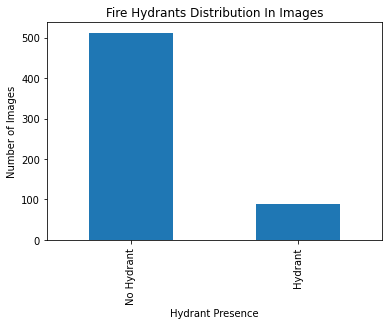

In [ ]:
# Plot a barplot of the number of fire hydrants

df.num_fire_hydrants.value_counts().plot.bar()
plt.title("Fire Hydrants Distribution In Images")
plt.xlabel("Hydrant Presence")
plt.ylabel("Number of Images")



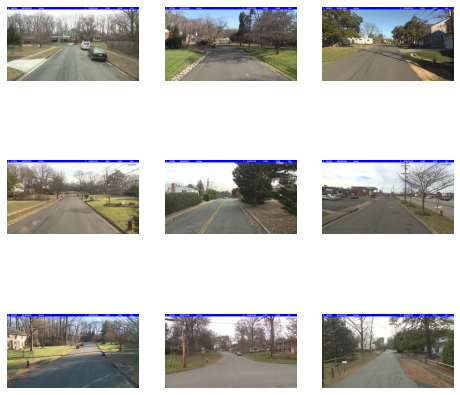

In [36]:
# Show some sample images with fire hydrants
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axs.flatten()):
    image = Image.open(df.loc[df['num_fire_hydrants'] > 0, 'image_path'].iloc[i])
    ax.imshow(image)
    ax.axis('off')
plt.show()

In [30]:
# Create a list to store number of images with and without fire hydrants
num_images_with_hydrant = 0
num_images_without_hydrant = 0

In [31]:
# Loop over image files and count number of images with and without fire hydrants
for file in image_files:
    if file.endswith('.jpg'):
        annotation_file = os.path.join(annotation_dir, file[:-4] + '.xml')
        with open(annotation_file, 'r') as f:
            xml = f.read()
            if '<name>fire hydrant</name>' in xml:
                num_images_with_hydrant += 1
            else:
                num_images_without_hydrant += 1

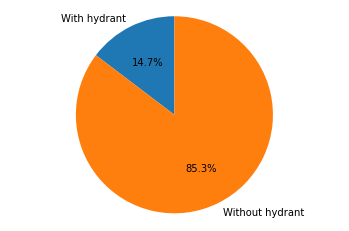

In [32]:
# Create a pie chart of the number of images with and without fire hydrants
fig, ax = plt.subplots()
ax.pie([num_images_with_hydrant, num_images_without_hydrant], labels=['With hydrant', 'Without hydrant'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()

In [33]:
# Print number of images with and without fire hydrants
print(f"Number of images with fire hydrants: {num_images_with_hydrant}")
print(f"Number of images without fire hydrants: {num_images_without_hydrant}")

Number of images with fire hydrants: 88
Number of images without fire hydrants: 512


In [34]:
# Create a list to store fire hydrant coordinates
x_coords = []
y_coords = []

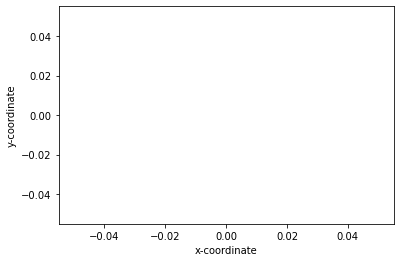

In [45]:
# Loop over image files and extract fire hydrant coordinates from annotations
for file in image_files:
    if file.endswith('.jpg'):
        annotation_file = os.path.join(annotation_dir, file[:-4] + '.xml')
        tree = ET.parse(annotation_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            if obj.find('name').text == 'firehydrant':
                bbox = obj.find('bndbox')
                x_min = int(bbox.find('xmin').text)
                y_min = int(bbox.find('ymin').text)
                x_max = int(bbox.find('xmax').text)
                y_max = int(bbox.find('ymax').text)
                x_center = round((x_min + x_max) / 2)
                y_center = round((y_min + y_max) / 2)
                x_coords.append(x_center)
                y_coords.append(y_center)

# Create a scatterplot of fire hydrant coordinates
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords, marker='.')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.show()

In [43]:
import xml.etree.ElementTree as ET


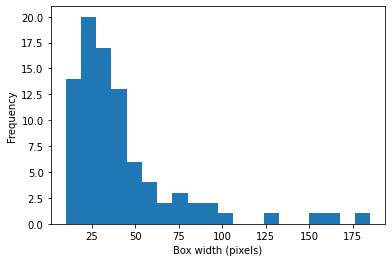

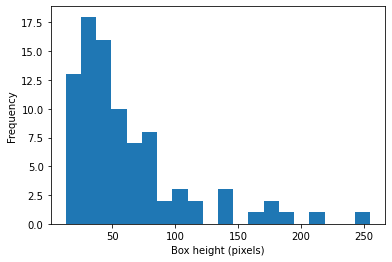

In [47]:

# Create a list to store bounding box widths and heights
box_widths = []
box_heights = []

# Loop over image files and extract bounding box widths and heights from annotations
for file in image_files:
    if file.endswith('.jpg'):
        annotation_file = os.path.join(annotation_dir, file[:-4] + '.xml')
        tree = ET.parse(annotation_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            if obj.find('name').text == 'fire hydrant':
                bbox = obj.find('bndbox')
                x_min = round(float(bbox.find('xmin').text))
                y_min = round(float(bbox.find('ymin').text))
                x_max = round(float(bbox.find('xmax').text))
                y_max = round(float(bbox.find('ymax').text))
                box_width = x_max - x_min
                box_height = y_max - y_min
                box_widths.append(box_width)
                box_heights.append(box_height)

# Create a histogram of bounding box widths
fig, ax = plt.subplots()
ax.hist(box_widths, bins=20)
ax.set_xlabel('Box width (pixels)')
ax.set_ylabel('Frequency')
plt.show()

# Create a histogram of bounding box heights
fig, ax = plt.subplots()
ax.hist(box_heights, bins=20)
ax.set_xlabel('Box height (pixels)')
ax.set_ylabel('Frequency')
plt.show()

In [48]:
import hashlib

In [49]:
## Duplicates removal

# Create empty list to store hash values

hashes = []

# Initialize counter for number of duplicates
num_duplicates = 0

# Loop over image files and remove duplicates
for file in os.listdir(image_dir):
    if file.endswith('.jpg'):
        # Open image file and compute hash value
        img_path = os.path.join(image_dir, file)
        with Image.open(img_path) as img:
            img_hash = hashlib.md5(img.tobytes()).hexdigest()
        # Check if hash value has been seen before
        if img_hash in hashes:
            # Remove duplicate image file and increment counter
            os.remove(img_path)
            num_duplicates += 1
            print(f'Removed duplicate image: {file}')
        else:
            hashes.append(img_hash)

print(f'Removed {num_duplicates} duplicate images')

Removed 0 duplicate images
